In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
#importing libraries
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical

In [5]:
#Defining paths in the directory as in the input section
car_path = "/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Car"
bike_path = "/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset/Bike"

In [8]:
#loading, resizing, normalizing images
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = load_img(os.path.join(folder, filename), target_size=(64, 64))  # Resize images to 64x64 pixels
        # Convert images with transparency to RGBA as KNN is used
        if img.mode == 'P' or img.mode == 'RGBA':
            img = img.convert('RGBA')
        img = img_to_array(img)
        img = img / 255.0  # Normalize the pixel values
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)

In [9]:
# Combine car and bike data 
images = np.concatenate((car_images, bike_images), axis=0) 
labels = np.concatenate((car_labels, bike_labels), axis=0)
#Car=0, Bike=1
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [10]:
# Flattening images (64x64x3 image into a single array of 12288 elements)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)


In [13]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_flattened, y_train)


KNeighborsClassifier(n_neighbors=3)

In [14]:
#predicting labels on test set
y_pred = knn.predict(X_test_flattened)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))

# Display classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.7375
Precision: 0.7576687116564417
Recall: 0.6534391534391535
F1-Score: 0.7017045454545455
              precision    recall  f1-score   support

           0       0.72      0.81      0.77       422
           1       0.76      0.65      0.70       378

    accuracy                           0.74       800
   macro avg       0.74      0.73      0.73       800
weighted avg       0.74      0.74      0.74       800



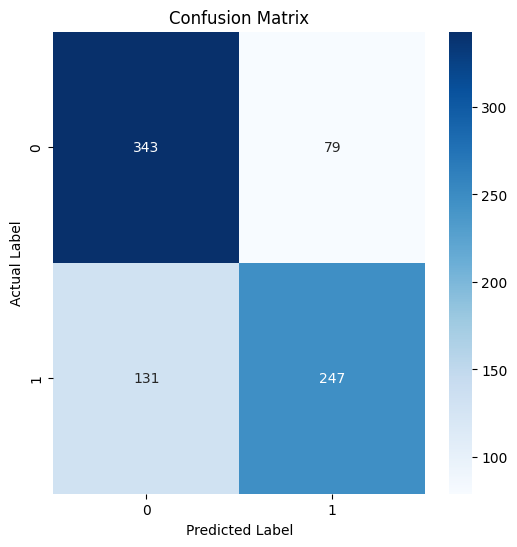

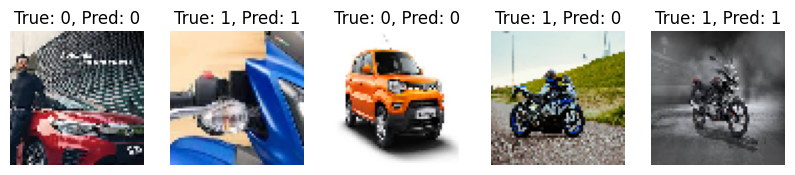

In [19]:
#classification report for required metrices
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

# Visualize some correctly and incorrectly classified images
def plot_samples(X, y_true, y_pred, num_samples=5):
    plt.figure(figsize=(10,10))
    for i in range(num_samples):
        plt.subplot(2, num_samples, i+1)
        plt.imshow(X[i])
        plt.title(f'True: {y_true[i]}, Pred: {y_pred[i]}')
        plt.axis('off')
    plt.show()

plot_samples(X_test, y_test, y_pred)